Found 60 files belonging to 2 classes.
Using 42 files for training.
Found 60 files belonging to 2 classes.
Using 18 files for validation.
Epoch 1/5
2/2 - 2s - loss: 13644.8467 - accuracy: 0.5476 - val_loss: 33840.8125 - val_accuracy: 0.2778 - 2s/epoch - 830ms/step
Epoch 2/5
2/2 - 1s - loss: 23141.8887 - accuracy: 0.4524 - 656ms/epoch - 328ms/step
Epoch 3/5
2/2 - 1s - loss: 8264.8477 - accuracy: 0.6429 - 665ms/epoch - 333ms/step
Epoch 4/5
2/2 - 1s - loss: 11604.2617 - accuracy: 0.6429 - 666ms/epoch - 333ms/step
Epoch 5/5
2/2 - 1s - loss: 7516.2285 - accuracy: 0.6429 - 704ms/epoch - 352ms/step
1/1 [==============================] - 0s 131ms/step - loss: 917.5228 - accuracy: 0.7222
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 flatten_2 (Flatten)      

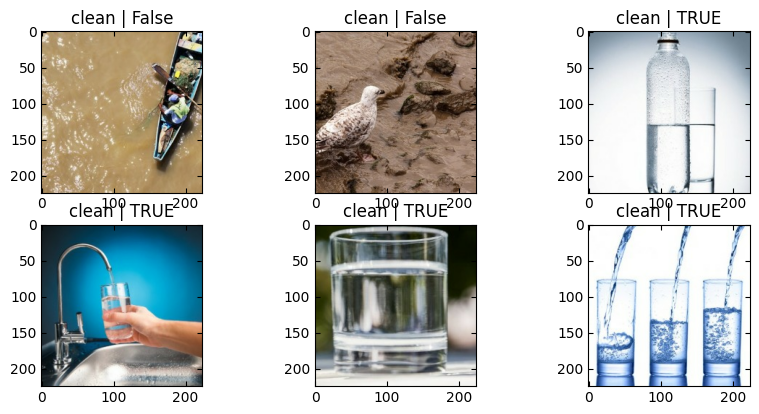

In [7]:
from zipfile import ZipFile
import tensorflow as tf
import pandas as pd
import PIL.Image
from PIL import Image,ImageTk
import os
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import random
from pathlib import Path
import imghdr
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from keras.preprocessing import image
from keras import layers
import warnings
from tkinter import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
import tkinter  as tk
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,NavigationToolbar2Tk)
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot
warnings.filterwarnings('ignore')
root =Tk()
root.title('water quality detection')
root.geometry('1000x1000')
def browse():
    def single():
        ll1 = Label(root,text='predicted image',width=70,font=("Times","20"),anchor=CENTER)
        ll1.pack()
        path=filedialog.askopenfilename(filetypes=[("Image File",'.jpg')])
        im = PIL.Image.open(path)
        img_pred = keras.utils.load_img(path,target_size=(224,224))
        img_pred = keras.utils.img_to_array(img_pred)
        img_pred = tf.expand_dims(img_pred,axis=0)
        rslt = model.predict(img_pred)
        print(rslt)
        if rslt[0][0]<rslt[0][1]:
            prediction = "Dirty"
        else:
            prediction = "Clean"
        l2 = Label(root,text=prediction,width=30,anchor=CENTER,font=("Times","15"))
        l2.place(relx = 0.4,rely = 0.5)
        
    def grouped():
        new = Toplevel(root)
        new.title('Prediction')
        new.geometry('1000x1000')
        l1=Label(new,text='Random predicted images',width=70,font=("Times","20"),anchor=CENTER)
        l1.pack()
        figim = plt.figure(figsize=(10, 10))
        class_names = val_data.class_names
        result = ' | False'
        for images, labels in val_data.take(1):
            for i in range(6):
                cx = Subplot(figim, 3,3, i + 1)
                figim.add_subplot(cx)
                img = images[i].numpy().astype("uint8")
                img = tf.expand_dims(img, axis=0)
                predictions = model.predict(img)
                print( predictions)
                predicted_class = np.argmax(predictions)
                if class_names[predicted_class] == class_names[labels[i]]:
                    result = ' | TRUE'    
                cx.imshow(images[i].numpy().astype("uint8"))
                cx.set_title(class_names[predicted_class]+result  )
                cx.axis("off")
        canvas = FigureCanvasTkAgg(figim,master =  new)
        canvas.draw()
        canvas.get_tk_widget().pack()
    path = 'D:\pooja\python\water images'
    data_dir = pathlib.Path(path)
    class_names = np.array(('clean','Dirty'))
    image_extensions = [".png", ".jpg"]  
    img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
    for filepath in Path(data_dir).rglob("*"):
        if filepath.suffix.lower() in image_extensions:
            img_type = imghdr.what(filepath)
            if img_type is None:
                print(f"{filepath} is not an image")
            elif img_type not in img_type_accepted_by_tf:
                print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
    batch_size = 32
    img_height = 224
    img_width = 224
    train_data = image_dataset_from_directory(data_dir,validation_split=0.3,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)
    val_data = image_dataset_from_directory(data_dir,validation_split=0.3,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)
    model = tf.keras.Sequential([layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)),layers.Flatten(),layers.Dense(2,activation='softmax'),])
    model.compile(optimizer = 'Adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])
    history = model.fit_generator(train_data,validation_data=val_data,validation_steps=4,epochs =5,verbose =2)
    history.history.keys()
    acc = history.history['accuracy']
    val_acc =  history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(5)
    model.evaluate(val_data)
    model.summary()
    l=Label(root,text='Model Training done!',width=70,font=("Times","20","bold"),anchor=CENTER)
    l.place(relx = 0.0,rely = 0.3)
    b1=Button(root,text = "single prediction",command = single,font=("Times","12"))
    b1.place(relx = 0.3,rely = 0.4)
    b2=Button(root,text = "group Prediction",command = grouped,font=("Times","12"))
    b2.place(relx = 0.7,rely = 0.4)
l3 = tk.Label(root,text='WATER QUALITY DETECTION',width=70,font=("Times","20","bold"),anchor=CENTER)
l3.pack()
button_explore = Button(root,text = "train model",command = browse,anchor=CENTER,font=("Times","15","bold"))
button_explore.place(relx = 0.5,rely = 0.2)
root.mainloop()